### DATA

In [2]:
import pandas as pd
data = pd.read_csv('milknew.csv')
data.head(5)

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


### ANALYZING THE DATA

In [3]:
data.shape

(1059, 8)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


In [5]:
data.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


### DATA CLEANING

In [6]:
""" 
1. Analyze the numerical and categorical features, and convert 
categorical feature into numerical.
"""
data['Grade'].unique()

array(['high', 'low', 'medium'], dtype=object)

In [7]:
# 2. Check for missing values and handle them.
data.isnull().sum()

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

### MODELLING

##### Konversi Class Label

In [8]:
# Mengubah class label menjadi bentuk angka sehingga dapat dibaca mesin
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['Grade']= label_encoder.fit_transform(data['Grade'])
data['Grade'].unique()

array([0, 1, 2])

In [9]:
data.head(5)

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,0
1,6.6,36,0,1,0,1,253,0
2,8.5,70,1,1,1,1,246,1
3,9.5,34,1,1,0,1,255,1
4,6.6,37,0,0,0,0,255,2


##### Splitting Data

In [19]:
from sklearn.model_selection import train_test_split
X = data.drop(['Grade'],axis=1)
y = data['Grade']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 3)

##### Decision Tree

In [20]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [21]:
class_result = decision_tree.predict(X_test)
class_result.shape

(318,)

In [26]:
class_result

array([1, 2, 1, 1, 1, 0, 1, 1, 2, 0, 1, 0, 1, 0, 1, 2, 0, 1, 0, 1, 2, 2,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 2, 0, 1, 2, 2, 1, 0, 0, 2, 2, 2, 0,
       1, 1, 2, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 0, 2, 2, 2, 2,
       2, 0, 1, 0, 1, 2, 2, 2, 0, 1, 2, 1, 0, 2, 1, 2, 0, 1, 2, 2, 0, 0,
       0, 1, 1, 0, 0, 0, 2, 0, 1, 1, 0, 2, 1, 0, 0, 0, 0, 1, 1, 2, 1, 2,
       2, 1, 2, 1, 1, 0, 1, 0, 2, 0, 2, 0, 2, 1, 0, 1, 0, 1, 2, 0, 2, 1,
       2, 1, 0, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1,
       2, 0, 1, 2, 2, 0, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 0, 0,
       2, 2, 0, 2, 0, 1, 2, 2, 1, 2, 2, 1, 1, 2, 0, 1, 1, 2, 1, 0, 2, 2,
       0, 2, 1, 1, 0, 1, 0, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2,
       1, 0, 2, 1, 2, 0, 0, 2, 0, 0, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0,
       1, 2, 2, 1, 0, 2, 1, 1, 0, 2, 2, 1, 0, 1, 2, 1, 0, 2, 0, 0, 1, 0,
       2, 2, 1, 2, 1, 0, 2, 0, 2, 1, 2, 2, 1, 2, 2, 0, 1, 2, 0, 1, 1, 2,
       0, 2, 2, 0, 0, 2, 1, 2, 2, 2, 1, 0, 0, 2, 2,

In [22]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(class_result, y_test)
accuracy

0.9937106918238994

##### Hierarchy

In [23]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'

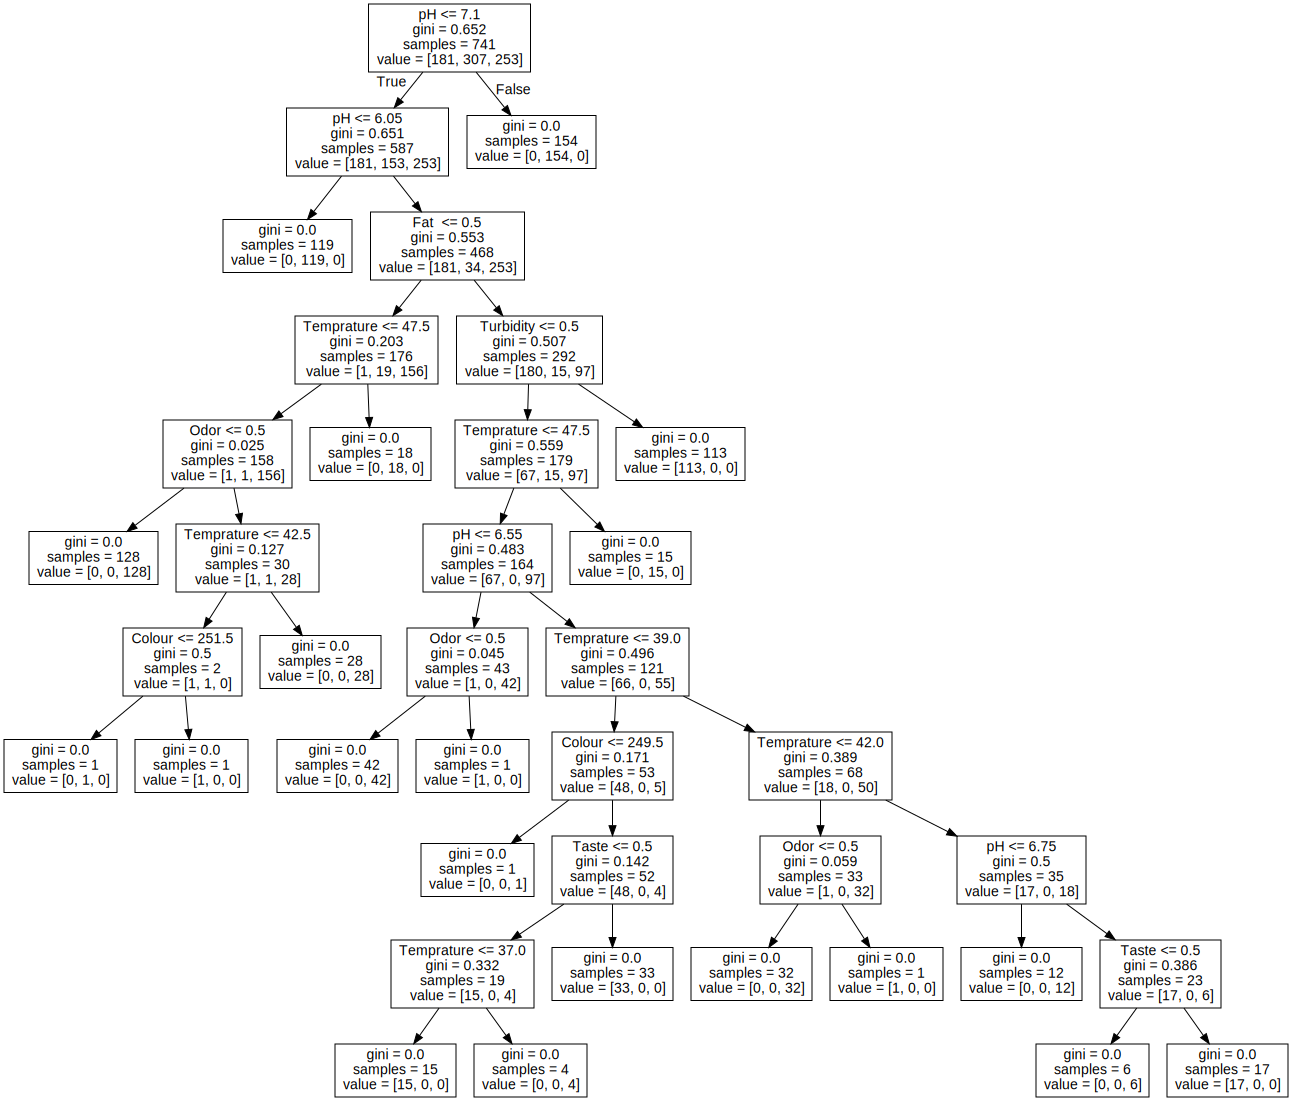

In [25]:
from sklearn import tree
import graphviz

dot_data = tree.export_graphviz(decision_tree, out_file=None, 
                                feature_names=X_train.columns.values)
graph = graphviz.Source(dot_data)
graph

#### Evaluating The Algorithm

In [33]:
from sklearn.metrics import classification_report, confusion_matrix
print('-CONFUSION MATRIX-')
print(confusion_matrix(y_test, class_result))

-CONFUSION MATRIX-
[[ 75   0   0]
 [  2 120   0]
 [  0   0 121]]


In [32]:
print(classification_report(y_test, class_result))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        75
           1       1.00      0.98      0.99       122
           2       1.00      1.00      1.00       121

    accuracy                           0.99       318
   macro avg       0.99      0.99      0.99       318
weighted avg       0.99      0.99      0.99       318

